
## Your Task 

Your task is to 'get to know' the BBB customer data by conducting descriptive analysis on the Python dictionary. This case should be completed using only Python's built-in libraries and the `pickle` and `numpy` libraries. We will use the Pandas library **only** in case we need to add row and/or column names to a numpy array for convenient indexing.

## For local analysis

If you prefer to develop your code in VS Code in a Jupyter notebook, you can download <a href="cases/mini_case_3.ipynb">mini_case_3.ipynb</a>. This notebook file has the same text and code snippets that you see on this webpage. After creating the required code, copy-and-paste it into the code-inputs on this webpage for testing. To complete all exercises below, you will also need data file: <a href="data/bbb_dct.pkl">bbb_dct.pkl</a>.


## Questions

In [1]:
# Question 3.01: The folder `data_mgta403/` contains a file called
# `bbb_dct.pkl` with the data described in Case 2. Load the dictionary using
# `pickle` and assign the dictionary to a new variable `bbb_dct`. Each value
# associated with a key is of type `list`. Convert each of these lists to a
# numpy array.

import numpy as np
# use pandas **only** for indexing in this case
# **not** for calculations
import pandas as pd
import pickle

with open("data/bbb_dct.pkl", "rb") as file:
    bbb_dct = pickle.load(file)
    
# convert the 'values' in the dictionary from list to np.array
bbb_dct = {i: np.array(bbb_dct[i]) for i in bbb_dct.keys()}

type(bbb_dct) # should return dict
type(bbb_dct["acctnum"]) # should return numpy.ndarray

numpy.ndarray

In [2]:
# Question 3.02: How many of BookBinder's customers identify as female? Assign
# your result to a new variable `count_female`. The return value should be of
# type integer.

# what levels does the "gender" variable have?
gndr = bbb_dct["gender"]
glevels = np.unique(gndr)
print(glevels)

# calculate the number of customers that are female
count_female = np.sum(gndr == "F")
count_female
type(count_female)


['F' 'M' 'O']


numpy.int64

In [3]:
# Question 3.03: What proportion of BookBinder's customers identify as male?
# Assign your result to a new Pandas DataFrame (`p_gender`) and ensure that
# `p_gender.loc["M", "nr"]` returns the value you want to submit as your
# answer.

# remember to use pandas **only** for indexing, **not** for calculations
# use numpy to deter the number of cases for each level in the "gender" variable
#counts = 
#type(counts) # should return tuple
#counts
total = len(gndr)
glevels, gcounts = np.unique(gndr, return_counts=True)
gtest = np.unique(gndr, return_counts=True)
print(gtest)
gprop = gcounts / total

# calculate the proportion of observations per gender level
p_gender = pd.DataFrame({
    "gen": glevels, 
    "count": gcounts,
    "nr": gprop
}).set_index("gen")

print(p_gender)

# check types 
type(p_gender) # should return pandas.DataFrame
type(p_gender.loc["M", "nr"]) # should return numpy.float64

p_gender.loc["M", "nr"]
type(gcounts)

(array(['F', 'M', 'O'], dtype='<U1'), array([29953, 16698,  3349]))
     count       nr
gen                
F    29953  0.59906
M    16698  0.33396
O     3349  0.06698


numpy.ndarray

In [4]:
# Question 3.04: Which three states have the most customers? Use numpy to
# determine the number of customers in each state. Then create a pandas
# DataFrame (`state_ncust`) that uses the state abbreviations as the `index`
# and stores the number of customers per state in column `nr`. Sort the
# DataFrame on number of customers in descending order, select the first three
# rows of the array, and assign this sub-DataFrame to variable `big3`.

# use numpy to count the number of customers per state
counts = np.unique(bbb_dct["state"], return_counts=True)

type(counts) # should return tuple
len(counts) # should return 2
len(counts[1]) # should return 15
type(counts[1])
print(counts[1])

# convert to a DataFrame and add an index and column name ("nr")
state_ncust = pd.DataFrame({"nr": counts[1]}, index=counts[0])

type(state_ncust)  # should return pandas.DataFrame
state_ncust.shape  # should return (15, 1)
print(state_ncust.head())

# sort and index to get the 3 states with the most customers
big3 = state_ncust.sort_values("nr", ascending=False)[:3]
type(big3)  # should return pandas.DataFrame
big3.shape  # should return (3, 1)

big3

[    5  2512   339   711  4252  4172   343   665 11068 16530  8718   402
    27    45   211]
      nr
AE     5
CT  2512
DC   339
DE   711
MA  4252


,nr
NY,16530
NJ,11068
PA,8718


In [50]:
# Question 3.05: Create a dictionary with the mean and standard deviation for
# the `last`, `total`, and `purch` variables. Assign the dictionary to a new
# variable `bbb_ms`. The dictionary should have length 3 and the keys should be
# `last`, `total`, and `purch`. Each dictionary value should be a tuple with
# the mean and standard deviation in that order. Use numpy methods (or
# functions) to calculate `mean` and `std` from an array you create (`A`) that
# contains `last`, `total`, and `purch` as its columns.

# use numpy's mean and std functions or methods
A = np.array([bbb_dct["last"], bbb_dct["total"], bbb_dct["purch"]]).transpose()

#print(A[:10,0])
#print(bbb_dct["last"][:10]) 
means = np.mean(A, axis=0)
stds = np.std(A, axis=0)
#print(means, stds)
cols = ["last", "total", "purch"]
bbb_ms = {cols[i]: (means[i], stds[i]) for i in range(3)}



type(bbb_ms)  # should return dict
len(bbb_ms)   # should return 3
type(bbb_ms["last"])  # should return tuple
len(bbb_ms["last"])  # should return 2

bbb_ms

{'last': (12.35816, 8.153009347130665),
 'total': (208.31832, 101.35624574922653),
 'purch': (3.89022, 3.4762347952346375)}

In [54]:
# Question 3.06: What is the (pearson) correlation between customers' total
# spending on books (i.e., the `book` variable) and total spending on non-book
# products (i.e., the `nonbook` variable)? Assign the correlation matrix to a
# variable called `bbb_corr`. Double check that this variable is of type
# `numpy.ndarray`.

# use numpy to calculate the correlation matrix for 'book' and 'nonbook'
bbb_corr = np.corrcoef(bbb_dct["book"], bbb_dct["nonbook"], )

type(bbb_corr)  # should be of type numpy.ndarray
bbb_corr.shape  # should return (2, 2)
bbb_corr


array([[1.        , 0.15743588],
       [0.15743588, 1.        ]])

In [73]:
# Question 3.07: BBB sells books in 7 main categories. In which category does
# BBB sell the most (least) books? Create a numpy array `bbb_books` with the
# total number of books sold in each category. Convert the numpy array to a
# pandas DataFrame. Set the index to the category names and columns to
# `['nr']`. Next create an pandas DataFrame `bbb_minmax` that has the category
# names of only the most and least selling book categories as the index and the
# corresponding number of books sold in a column `nr`. `bbb_minmax` should be
# sorted in descending order.

categories = ["child", "youth", "cook", "do_it", "reference", "art", "geog"]

# use numpy to create a one-dimensional array with 7 integer values 
bbb_books = np.array([np.sum(bbb_dct[i]) for i in categories])

# convert bbb_books to a pandas dataframe
bbb_books = pd.DataFrame(bbb_books, index = categories, columns=["nr"])

# use pandas for sorting and indexing
bbb_minmax = bbb_books.sort_values("nr", ascending = False).iloc[[0, -1]]

type(bbb_books)   # should return pandas.DataFrame
bbb_books.shape   # should return (7, 1)

bbb_minmax

,nr
cook,46830.0
reference,15612.0


{'M': 58.3129117259552, 'O': 41.292923260674826, 'F': 41.04834240309819}


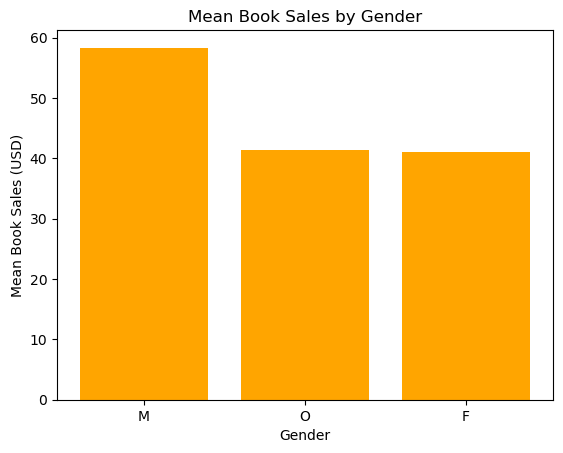

In [92]:
# Question 3.08: What is the mean for the "book" variable (i.e., $ spent on
# books) for each gender? Create a dictionary (`bbb_mean_books`) that uses the
# genders as the keys and the average of the `book` variable for a gender as
# the value. Optional: Use the `seaborn` library to show the means as a
# barplot.

# define 'mean_gender' function and use numpy for calculations
def mean_gender(gname):
    gfilt = bbb_dct["gender"] == gname
    return np.mean(bbb_dct["book"][gfilt])
            

bbb_mean_books = {g: mean_gender(g) for g in np.unique(bbb_dct["gender"])}
bbb_mean_books = dict(sorted(bbb_mean_books.items(), key=lambda item: item[1], reverse = True))

type(bbb_mean_books)  # should return dict
len(bbb_mean_books)   # should return 3

print(bbb_mean_books)

# optional: Plot the means in a barplot
import seaborn as sns
import matplotlib.pyplot as plt
x = bbb_mean_books.keys()
y = bbb_mean_books.values()

plt.bar(x, y, color = "orange")
plt.xlabel("Gender")
plt.ylabel("Mean Book Sales (USD)")
plt.title("Mean Book Sales by Gender")
# show plot
plt.show()

In [106]:
# Question 3.09: What proportion of male/female/other customers bought _The Art
# History of Florence_? Return a dictionary `bbb_ahf_buy` with the required
# information. Double check that the dictionary has length 3 and contains the
# numbers that capture the conditional probabilities of buying **given the
# gender identity of a customer**.

# define 'prop_gender' function and use numpy for calculations
genders = np.unique(bbb_dct["gender"], return_counts=True)
gdct = dict(zip(genders[0],genders[1]))
def prop_gender(gname):
    return np.sum((bbb_dct["buyer"] == 'yes') & (bbb_dct["gender"] == gname)) / gdct[gname]

bbb_ahf_buy = {g: prop_gender(g) for g in gdct.keys()}

type(bbb_ahf_buy)  # should return dict
len(bbb_ahf_buy)   # should return 3

bbb_ahf_buy

{'F': 0.07097786532233832, 'M': 0.1277398490837226, 'O': 0.07853090474768587}

In [125]:
# Question 3.10: Determine the minimum and maximum number of months between a
# customers' first and last (i.e., most recent) purchase. Create a new entry in
# the `bbb_dct` dictionary with key `mdiff` that captures the number of months
# between the `first` and `last` purchase for each customer. Then, calculate
# the minimum and maximum of this new variable. Return a dictionary `bbb_mdiff`
# with the required information. Double check that the dictionary has length 3
# and that the keys for the new dictionary are `min`, `max`, and `mean`.

# adding to the bbb_dct dictionary
bbb_dct["mdiff"] = bbb_dct["first"] - bbb_dct["last"]

# option 1: use numpy's min, max, and mean methods
bbb_mdiff = {
    "min": np.min(bbb_dct["mdiff"]),
    "max": np.max(bbb_dct["mdiff"]),
    "mean": np.mean(bbb_dct["mdiff"])
}

type(bbb_mdiff)  # should return dictionary
len(bbb_mdiff)  # should return 3

bbb_mdiff
type(bbb_dct["mdiff"])

numpy.ndarray

In [136]:
# Question 3.11: What proportion of repeat customers (i.e., those with two or
# more total purchases) bought _The Art History of Florence_? Return a `float`.
diff = bbb_dct["first"] - bbb_dct["last"]
bbb_prep = np.sum((diff != 0) & (bbb_dct["buyer"] == "yes")) / len(diff[diff != 0])
bbb_prep = (bbb_dct["mdiff"] != 0)[bbb_dct["buyer"] == "yes"].mean()

#type(bbb_prep)  # should return a numpy.float

bbb_prep

0.7956656346749226

In [ ]:
# Question 3.12: If you used Code Interpreter in ChatGPT+, please provide the link to the chat session you used here. You can find the link by clicking on the 'Share' button in the upper right corner of the ChatGPT+ window as shown in the screenshot below. If you used another AI-tool, please provide your prompt and the URL for the tool.

<div style="text-align:center;">
  <img src="images/ebike-trails.png" height="500px" />
</div>


In [ ]:
# Question 3.13: Please write a short reflection on what Generative AI-tools were and were not useful for when you worked on this case. 3-4 lines of text should be sufficient.